In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
# plt.style.use('ggplot')

scatter_matrix()

sns.countplot(x='education', hue='party', data=df, palette='RdBu')

In [15]:
iris = datasets.load_iris() # load_digits() for MNIST
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [19]:
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target

In [21]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


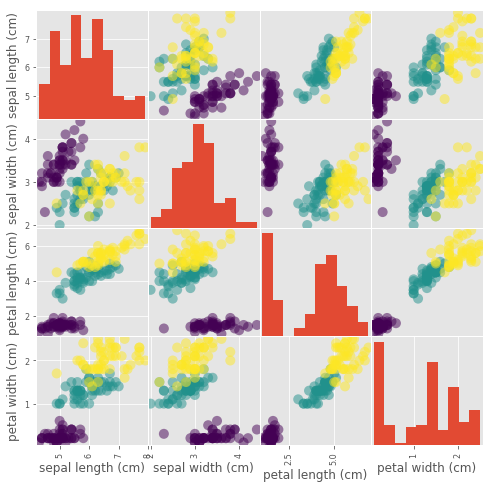

In [39]:
_ = pd.plotting.scatter_matrix(X, c=y, figsize=[8, 8], s=100, marker='o', alpha=0.5)

plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=241)

In [53]:
n_neighb = np.arange(2, 15, 2)
scores = np.empty(n_neighb.shape[0])

cv = KFold(n_splits=5, shuffle=True, random_state=241)

for ind, cur_n in enumerate(n_neigb):
    clf_knn = KNeighborsClassifier(n_neighbors=cur_n, n_jobs=-1)
    score = np.mean(
        cross_val_score(clf_knn, X_train, y_train, cv = cv, n_jobs=-1)
    )
    scores[ind] = score
    print('{0} is complete'.format(ind))

0 is complete
1 is complete
2 is complete
3 is complete
4 is complete
5 is complete
6 is complete


Optimal number of neighbors = 10


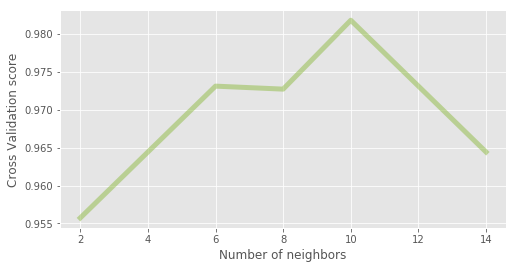

In [64]:
neigb_opt = n_neighb[np.argmax(scores)]
print('Optimal number of neighbors = {0}'.format(neigb_opt))

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(n_neighb, scores, color='C5', alpha=0.5, lw=5)
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Cross Validation score')

plt.show()

In [68]:
clf_knn = KNeighborsClassifier(n_neighbors=neigb_opt, n_jobs=-1)

clf_knn = clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

In [89]:
accuracy   = accuracy_score(y_test, y_pred)
precision  = precision_score(y_test, y_pred, average=None)
recall     = recall_score(y_test, y_pred, average=None)
f_measure  = f1_score(y_test, y_pred, average=None)

lab = ['Precision', 'Recall', 'f measure']

print('Accuracy: {:0.3f}'.format(accuracy))

for ind, cur_score in enumerate([precision, recall, f_measure]):
    print('{:}: class1 = {:0.3f}; class2 = {:0.3f}; class3 = {:0.3f}'.format(
        lab[ind], cur_score[0], cur_score[1], cur_score[2])
    )



Accuracy: 0.974
Precision: class1 = 1.000; class2 = 0.941; class3 = 1.000
Recall: class1 = 1.000; class2 = 1.000; class3 = 0.875
f measure: class1 = 1.000; class2 = 0.970; class3 = 0.933


## Plot Confusion matrix.

and write additionsl comments